In [20]:
# Correct import for Google Drive in Colab
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [21]:
import pandas as pd
pd.set_option("display.max_rows", None)
import unicodedata
import gzip
import json

In [22]:
file_path = "df_fully_cleaned.csv"
df = pd.read_csv(file_path)
df.head(5)

,row_id,brand_name,language_code,google_category_id,row_weight,clean_brand_name,category_level_1,category_level_2,category_level_3,category_level_4,category_level_5,category_level_6,category_level_7
0,0,NaN,en,691,0.505044,-1,Home & Garden,Lawn & Garden,Gardening,Disease Control,NaN,NaN,NaN
1,1,NaN,ja,325,0.632272,-1,Electronics,Computers,Desktop Computers,NaN,NaN,NaN,NaN
2,2,NaN,nl,176,0.492944,-1,Apparel & Accessories,Clothing Accessories,Neckties,NaN,NaN,NaN,NaN
3,3,NaN,pt,1033,0.582456,-1,Sporting Goods,Outdoor Recreation,Hunting & Shooting,Archery,NaN,NaN,NaN
4,4,100%,de,499845,0.355131,100,Sporting Goods,Outdoor Recreation,Winter Sports & Activities,Skiing & Snowboarding,NaN,NaN,NaN


In [23]:
df_sampled = df.sample(frac=0.2, random_state=2)

# Fuzzy

The goal of this section is to identify similar brand names using fuzzy matching techniques. This helps in cases where:

Brand names may have slight variations (e.g., "L'Oréal" vs. "LOreal").
There may be typos or formatting differences.
We want to group similar brands together for analysis.

In [24]:
#!pip install fuzzywuzzy python-Levenshtein


In [25]:
from fuzzywuzzy import fuzz

def filter_brands(df, column_name, threshold=70, score_func=fuzz.ratio):
    filtered_brands = []
    # Convert all non-null values to strings
    brands = [str(brand) for brand in df[column_name].tolist() if pd.notnull(brand)]
    seen_pairs = set()
    for i, brand1 in enumerate(brands):
        for j, brand2 in enumerate(brands):
            if i != j and brand1 != brand2:
                pair = tuple(sorted((brand1, brand2)))
                if pair not in seen_pairs:
                    seen_pairs.add(pair)
                    # Calculate the score using the provided scoring function
                    score = score_func(brand1, brand2)
                    if score > threshold:
                        filtered_brands.append((brand1, brand2, score))
    return filtered_brands


filtered_brands = filter_brands(df_sampled, 'clean_brand_name', threshold=70)
print("Brands with coefficient higher than 70%:")
for brand1, brand2, score in filtered_brands:
    print(f"{brand1} and {brand2}: {score}%")


Brands with coefficient higher than 70%:
tateossian and tessan: 75%
tateossian and aeolian: 71%
cocacola and coola: 77%
sanus and sansha: 73%
harvilon and revlon: 71%
harvilon and haribo: 71%
harvilon and hailo: 77%
harvilon and arvin: 77%
harvilon and hario: 77%
worlde and woden: 73%
worlde and seeworld: 71%
levis and elemis: 73%
levis and tevise: 73%
levis and alexis: 73%
levis and alesis: 73%
batmax and bmax: 80%
batmax and batman: 83%
batmax and bama: 80%
batmax and hamax: 73%
avid and mavi: 75%
avid and raid: 75%
avid and yavida: 80%
canon and danone: 73%
canon and caponi: 73%
canon and cannon: 91%
canon and dannon: 73%
canon and agnona: 73%
canon and calgon: 73%
canon and canner: 73%
canon and chanzon: 83%
canon and chandon: 83%
canon and carnation: 71%
canon and anmone: 73%
canon and canni: 80%
canon and cinoon: 73%
balmain and bali: 73%
balmain and blumarine: 75%
balmain and ballarini: 75%
balmain and batman: 77%
balmain and balmain kids: 74%
balmain and bama: 73%
balmain and a

In [26]:
import matplotlib.pyplot as plt


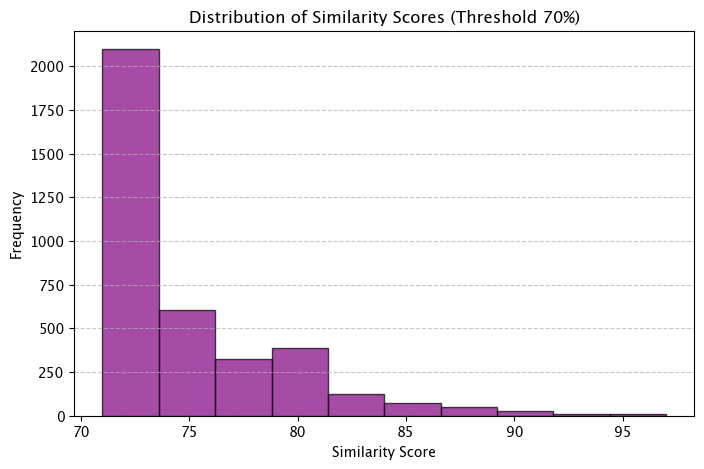

In [27]:
similarity_scores = [score for _, _, score in filtered_brands]

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 5))
plt.hist(similarity_scores, bins=10, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Similarity Scores (Threshold 70%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [28]:
filtered_brands = filter_brands(df_sampled, 'clean_brand_name', threshold=90)
print("Brands with coefficient higher than 70%:")
for brand1, brand2, score in filtered_brands:
    print(f"{brand1} and {brand2}: {score}%")

Brands with coefficient higher than 70%:
canon and cannon: 91%
under armor and under armour: 96%
brooks and brook: 91%
fisherprice and fisher price: 96%
other and others: 91%
other and mother: 91%
enesco and nesco: 91%
isecret and secret: 92%
unite and unitek: 91%
lazer and blazer: 91%
command and commando: 93%
scott and schott: 91%
barena and arena: 91%
harley davidson and harleydavidson: 97%
jfg racing and jfgracing: 95%
icreative and creative: 94%
caline and cline: 91%
celine and cline: 91%
montblanc and mont blanc: 95%
medela and medea: 91%
dickies and dickie: 92%
palmers and palmes: 92%
alexanderwangt and alexander wang: 93%
mooer and moorer: 91%
eranpo and ranpo: 91%
haribo and hario: 91%
candy girl and candygirl: 95%
meindl and meinl: 91%
casemate and case mate: 94%
atorch and torch: 91%
angol and anogol: 91%
paper mate and papermate: 95%
drjart and dr jart: 92%
aister and aster: 91%
flexon and flexson: 92%
imagic and magic: 91%
tetra and tectra: 91%
oceane and ocean: 91%
audio 

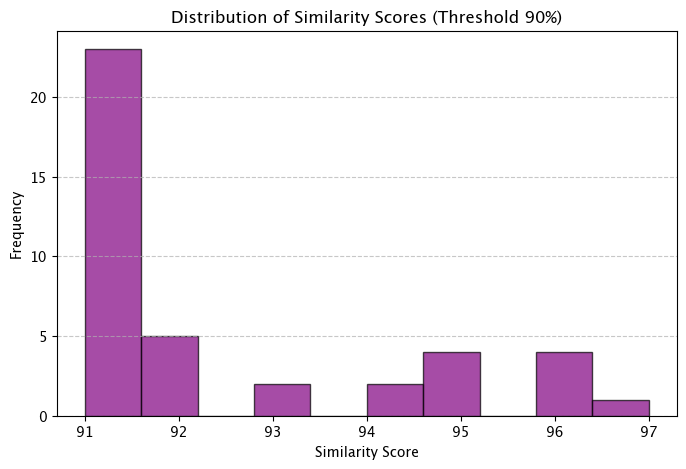

In [29]:
similarity_scores = [score for _, _, score in filtered_brands]

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 5))
plt.hist(similarity_scores, bins=10, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Similarity Scores (Threshold 90%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Jaccard

In this section, we use Jaccard similarity to compare brand names. Unlike fuzzy matching (which is based on Levenshtein distance), Jaccard similarity focuses on set similarity. This approach is particularly useful when:

Brand names share common words but have different formats.
We want to reduce the impact of small typos.
We want to penalize common words that appear in many brand names.


In [30]:
def jaccard_similarity(s1, s2, token_based=False):
    """
    Computes the Jaccard similarity between two strings.

    Parameters:
        s1, s2 (str): The strings to compare.
        token_based (bool): If True, splits the strings into tokens (words) before computing.
                            If False, uses characters.

    Returns:
        int: The Jaccard similarity score as a percentage.
    """
    # Normalize to lower-case
    s1, s2 = s1.lower(), s2.lower()

    if token_based:
        # Compute Jaccard similarity based on tokens (e.g., words)
        set1 = set(s1.split())
        set2 = set(s2.split())
    else:
        # Compute Jaccard similarity based on characters
        set1 = set(s1)
        set2 = set(s2)

    intersection = set1.intersection(set2)
    union = set1.union(set2)

    # Avoid division by zero
    if not union:
        return 0

    # Multiply by 100 to express as a percentage
    return int((len(intersection) / len(union)) * 100)

def filter_brands(df, column_name, threshold=70, score_func=jaccard_similarity):
    filtered_brands = []
    # Convert all non-null values to strings
    brands = [str(brand) for brand in df[column_name].tolist() if pd.notnull(brand)]
    seen_pairs = set()

    for i, brand1 in enumerate(brands):
        for j, brand2 in enumerate(brands):
            if i != j and brand1 != brand2:
                pair = tuple(sorted((brand1, brand2)))
                if pair not in seen_pairs:
                    seen_pairs.add(pair)
                    # Calculate the score using the provided scoring function
                    score = score_func(brand1, brand2)
                    if score > threshold:
                        filtered_brands.append((brand1, brand2, score))
    return filtered_brands

# Example usage:
# Assuming you have a DataFrame 'df_sampled' with a column 'clean_brand_name'
filtered_brands = filter_brands(df_sampled, 'clean_brand_name', threshold=70, score_func=jaccard_similarity)
print("Brands with Jaccard similarity higher than 70%:")
for brand1, brand2, score in filtered_brands:
    print(f"{brand1} and {brand2}: {score}%")


Brands with Jaccard similarity higher than 70%:
tateossian and annies: 71%
tateossian and eaton: 71%
tateossian and tessan: 71%
tateossian and samsonite: 87%
tateossian and diatone: 75%
tateossian and aensoa: 71%
tateossian and santorelli: 77%
tateossian and ginstonelate: 77%
tateossian and fornasetti: 77%
tateossian and simonetta: 87%
tateossian and vinsetto: 75%
tateossian and konstantino: 75%
tateossian and ariston: 75%
tateossian and antonelli: 75%
tateossian and bostonian: 75%
tateossian and sebastian: 75%
tateossian and ostent: 71%
tateossian and temptations: 77%
tateossian and neato: 71%
tateossian and meotina: 75%
kikkoman and nokia: 83%
kikkoman and maikun: 71%
kikkoman and konami: 100%
kikkoman and naomi: 83%
kikkoman and maijion: 71%
kikkoman and amazonia: 71%
cocacola and focal: 80%
cocacola and calor: 80%
cocacola and alc: 75%
cocacola and aoc: 75%
cocacola and lofca: 80%
cocacola and laoa: 75%
cocacola and coola: 100%
sanus and susa: 75%
sanus and asus: 75%
sanus and dusa

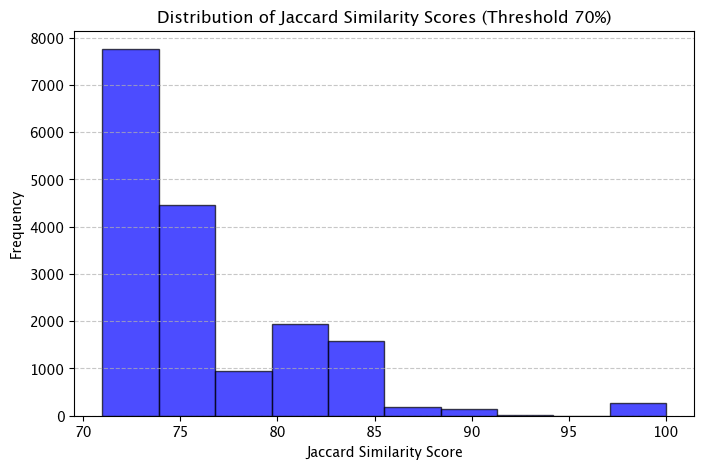

In [31]:
similarity_scores = [score for _, _, score in filtered_brands]

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 5))
plt.hist(similarity_scores, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Jaccard Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Jaccard Similarity Scores (Threshold 70%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [32]:
filtered_brands = filter_brands(df_sampled, 'clean_brand_name', threshold=90,
                                  score_func=lambda s1, s2: jaccard_similarity(s1, s2, token_based=True))


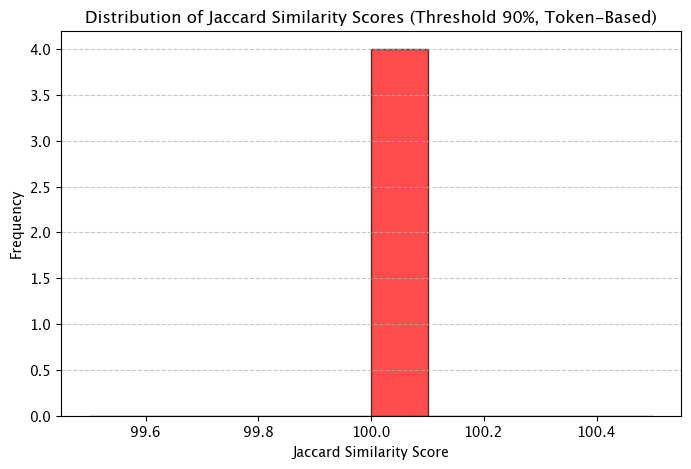

In [33]:

# Extract similarity scores from the filtered results
similarity_scores = [score for _, _, score in filtered_brands]

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 5))
plt.hist(similarity_scores, bins=10, color='red', alpha=0.7, edgecolor='black')
plt.xlabel('Jaccard Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Jaccard Similarity Scores (Threshold 90%, Token-Based)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Jaccard with penalty for common words

In [34]:
from nltk.corpus import words

import nltk
nltk.download('words')
english_vocab = set(w for w in words.words())

def jaccard_with_common_penalty(s1, s2, english_vocab, alpha=1.0):
    """
    Compute the Jaccard similarity between two strings s1 and s2,
    then penalize the similarity if many of the overlapping words are common English words.
    This function returns a score between 0 and 100, matching the output of fuzz.ratio.

    Parameters:
      s1, s2: Input strings (assumed already lower case, stripped, and cleaned).
      english_vocab: A set of common English words.
      alpha: Penalty factor (alpha=1.0 applies full penalty).

    Returns:
      An integer similarity score between 0 and 100.
    """
    # Tokenize the strings based on whitespace (already cleaned)
    tokens1 = set(s1.split())
    tokens2 = set(s2.split())

    union_tokens = tokens1.union(tokens2)
    if not union_tokens:
        return 0  # Avoid division by zero if both strings are empty

    intersection_tokens = tokens1.intersection(tokens2)

    # Base Jaccard similarity as a fraction
    jaccard = len(intersection_tokens) / len(union_tokens)

    # Determine penalty: fraction of overlapping tokens that are common English words
    if not intersection_tokens:
        penalty = 0
    else:
        common_intersection = {w for w in intersection_tokens if w in english_vocab}
        penalty = len(common_intersection) / len(intersection_tokens)

    # Apply the penalty to the Jaccard score
    adjusted_score = jaccard * (1 - alpha * penalty)

    # Convert to a percentage (0-100) to mimic fuzz.ratio
    return int(adjusted_score * 100)

def filter_brands(df, column_name, threshold=70, score_func=jaccard_with_common_penalty, english_vocab=english_vocab, alpha=1.0):
    """
    Filter pairs of brand names whose similarity score (computed using score_func)
    exceeds the given threshold.

    Assumes the brand names in the DataFrame are already in lower case, stripped,
    and with special characters removed.

    Parameters:
      df: Pandas DataFrame containing the brand data.
      column_name: Name of the column with brand names.
      threshold: Similarity threshold (default 70, matching a percentage score).
      score_func: Function to compute similarity between two strings.
      english_vocab: Set of common English words.
      alpha: Penalty factor to pass to score_func.

    Returns:
      A list of tuples (brand1, brand2, score) for pairs with score > threshold.
    """
    filtered_brands = []
    brands = [str(brand).strip() for brand in df[column_name].tolist() if pd.notnull(brand)]
    seen_pairs = set()

    for i, brand1 in enumerate(brands):
        for j, brand2 in enumerate(brands):
            if i != j and brand1 != brand2:
                pair = tuple(sorted((brand1, brand2)))
                if pair not in seen_pairs:
                    seen_pairs.add(pair)
                    score = score_func(brand1, brand2, english_vocab, alpha=alpha)
                    if score > threshold:
                        filtered_brands.append((brand1, brand2, score))
    return filtered_brands


[nltk_data] Downloading package words to /Users/Clara/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [35]:
filtered_brands_custom = filter_brands(df_sampled, 'clean_brand_name', threshold=70,
                                         score_func=jaccard_with_common_penalty, alpha=1.0)

print("Brand pairs with custom similarity (Jaccard + penalty) above threshold:70%")
for b1, b2, score in filtered_brands_custom:
    print(f"{b1} and {b2}: {score}%")


Brand pairs with custom similarity (Jaccard + penalty) above threshold:70%
michael kors and michael michael kors: 100%
joseph joseph and joseph: 100%
victoria beckham and victoria victoria beckham: 100%
comme des garcons and comme des garcons shirt: 75%
comme des garcons and comme des garcons homme: 75%
comme des garcons and comme des garcons wallet: 75%


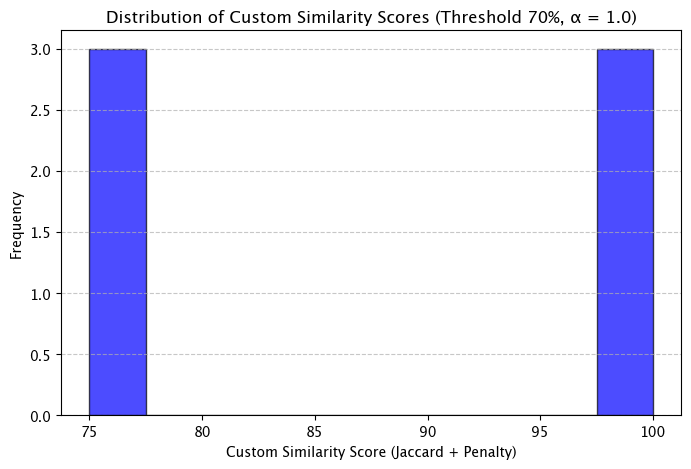

In [36]:
similarity_scores_custom = [score for _, _, score in filtered_brands_custom]

# Define alpha value used in the function
alpha_value = 1.0  # Ensure this matches the alpha used in jaccard_with_common_penalty

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 5))
plt.hist(similarity_scores_custom, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Custom Similarity Score (Jaccard + Penalty)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Custom Similarity Scores (Threshold 70%, α = {alpha_value})')
plt.grid(axis='y', linestyle='--', alpha=0.7)


In [37]:
filtered_brands_custom_50 = filter_brands(df_sampled, 'clean_brand_name', threshold=70,
                                         score_func=jaccard_with_common_penalty, alpha=0.2)

print("Brand pairs with custom similarity (Jaccard + penalty) above threshold:")
for b1, b2, score in filtered_brands_custom_50:
    print(f"{b1} and {b2}: {score}%")

Brand pairs with custom similarity (Jaccard + penalty) above threshold:
ralph lauren and lauren ralph lauren: 90%
michael kors and michael michael kors: 100%
joseph joseph and joseph: 100%
victoria beckham and victoria victoria beckham: 100%
comme des garcons and comme des garcons shirt: 75%
comme des garcons and comme des garcons homme: 75%
comme des garcons and comme des garcons wallet: 75%


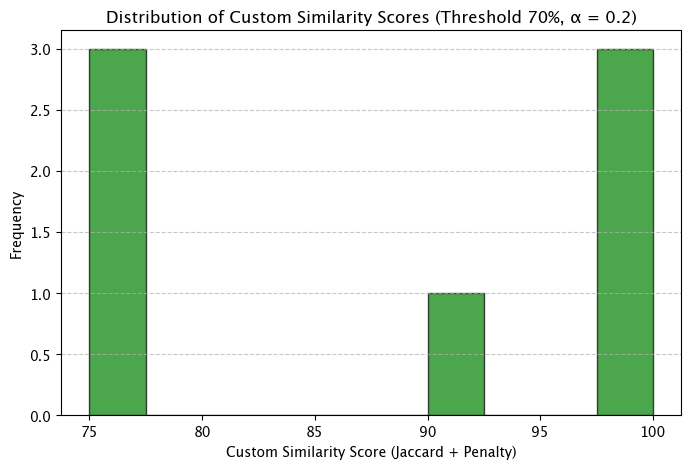

In [38]:
# Extract similarity scores from the filtered results
similarity_scores_custom_50 = [score for _, _, score in filtered_brands_custom_50]

# Define alpha value used in the function
alpha_value = 0.2  # Ensure this matches the alpha used in jaccard_with_common_penalty

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 5))
plt.hist(similarity_scores_custom_50, bins=10, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Custom Similarity Score (Jaccard + Penalty)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Custom Similarity Scores (Threshold 70%, α = {alpha_value})')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

none of the tokens in the intersection are found in english_vocab, then common_intersection is empty and penalty = 0
even at different alphas

In [39]:
filtered_brands_custom_ = filter_brands(df_sampled, 'clean_brand_name', threshold=50,
                                         score_func=jaccard_with_common_penalty, alpha=0.2)

print("Brand pairs with custom similarity (Jaccard + penalty) above threshold:")
for b1, b2, score in filtered_brands_custom_:
    print(f"{b1} and {b2}: {score}%")

Brand pairs with custom similarity (Jaccard + penalty) above threshold:
alexander mcqueen and mcq alexander mcqueen: 66%
palm angels kids and palm angels: 60%
ralph lauren and polo ralph lauren: 60%
ralph lauren and ralph lauren collection: 60%
ralph lauren and lauren ralph lauren: 90%
yves saint laurent and saint laurent: 60%
marc jacobs and marc by marc jacobs: 60%
marc jacobs and marc jacobs kids: 60%
polo ralph lauren and polo ralph lauren kids: 65%
polo ralph lauren and lauren ralph lauren: 60%
michael kors and michael kors collection: 66%
michael kors and michael michael kors: 100%
perfect moment and perfect moment kids: 53%
max mara and s max mara: 66%
max mara and max mara leisure: 66%
max mara and weekend max mara: 66%
calvin klein and calvin klein jeans: 66%
calvin klein and calvin klein underwear: 66%
isabel marant and isabel marant etoile: 66%
michael kors collection and michael michael kors: 66%
stella mccartney kids and stella mccartney: 60%
joseph joseph and joseph: 100%

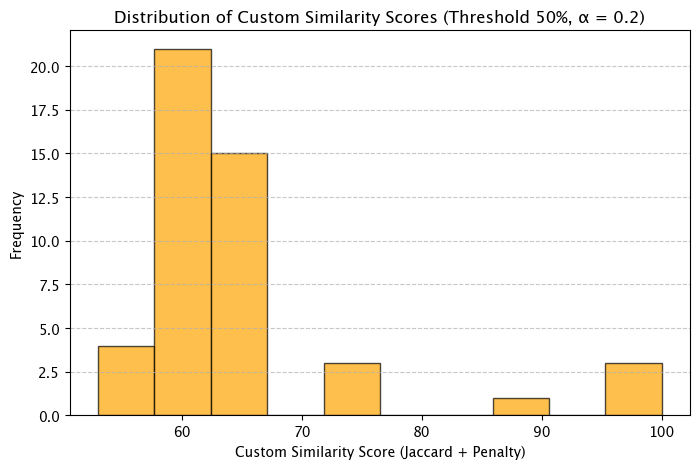

In [40]:
similarity_scores_custom_ = [score for _, _, score in filtered_brands_custom_]

# Define alpha value and threshold used in the function
alpha_value = 0.2  # Ensure this matches the alpha used in jaccard_with_common_penalty
threshold_value = 50  # Threshold used in filtering

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 5))
plt.hist(similarity_scores_custom_, bins=10, color='orange', alpha=0.7, edgecolor='black')
plt.xlabel('Custom Similarity Score (Jaccard + Penalty)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Custom Similarity Scores (Threshold {threshold_value}%, α = {alpha_value})')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def get_brand_scores(df, column_name, score_func=jaccard_with_common_penalty,
                     english_vocab=english_vocab, alpha=1.0):
    """
    Computes the similarity score for every unique pair of brand names in the specified column.

    Parameters:
      df (pd.DataFrame): The DataFrame containing brand data.
      column_name (str): The column in df with brand names.
      score_func (callable): A function that takes (brand1, brand2, english_vocab, alpha)
                             and returns a similarity score.
      english_vocab (set): A set of common English words.
      alpha (float): The penalty factor for the scoring function.

    Returns:
      List of tuples (brand1, brand2, score).
    """
    brand_scores = []
    brands = [str(brand).strip() for brand in df[column_name].tolist() if pd.notnull(brand)]

    seen_pairs = set()

    for i, brand1 in enumerate(brands):
        for j in range(i + 1, len(brands)):  # use i+1 so we don't repeat pairs in reverse
            brand2 = brands[j]
            pair = tuple(sorted((brand1, brand2)))
            if pair not in seen_pairs:
                seen_pairs.add(pair)
                score = score_func(brand1, brand2, english_vocab, alpha=alpha)
                brand_scores.append((brand1, brand2, score))

    return brand_scores


In [42]:
# 1. Compute all pairwise scores
brand_score_list = get_brand_scores(
    df_sampled,
    'clean_brand_name',
    score_func=jaccard_with_common_penalty,
    english_vocab=english_vocab,
    alpha=1.0
)

# 2. Convert to DataFrame
df_scores = pd.DataFrame(brand_score_list, columns=['brand1', 'brand2', 'score'])




In [43]:
df_scores.head(50)

,brand1,brand2,score
0,tcl,tateossian,0
1,tcl,kikkoman,0
2,tcl,west biking,0
3,tcl,eqz,0
4,tcl,cocacola,0
5,tcl,nubwo,0
6,tcl,sanus,0
7,tcl,harvilon,0
8,tcl,-1,0
9,tcl,wicgtyp,0


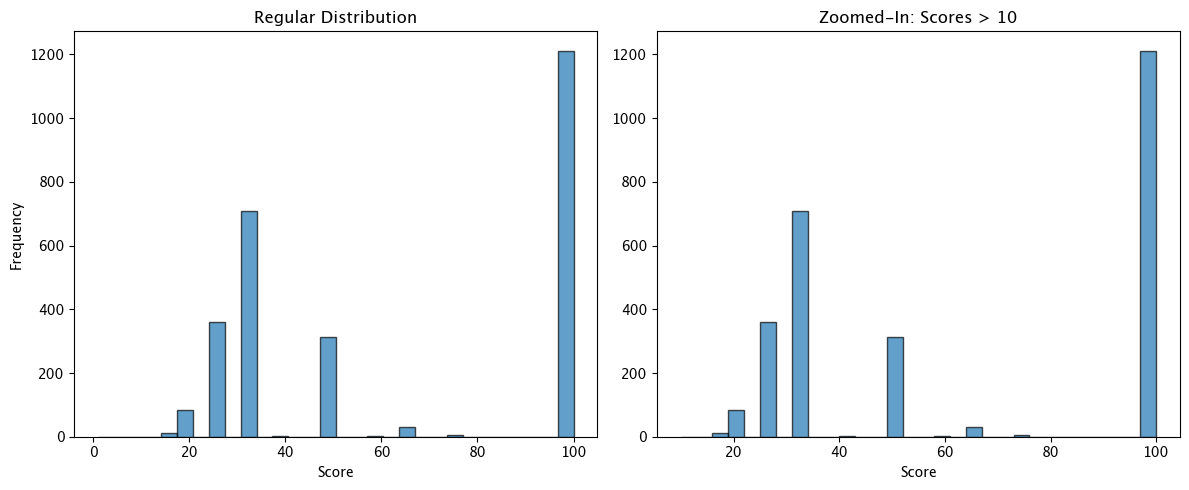

In [44]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Regular Histogram
axes[0].hist(df_scores['score'], bins=30, range=(1,100), edgecolor='black', alpha=0.7)
axes[0].set_title("Regular Distribution")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Frequency")

# Zoomed-in Histogram (excluding low scores)
axes[1].hist(df_scores[df_scores['score'] > 10]['score'], bins=30, range=(10,100), edgecolor='black', alpha=0.7)
axes[1].set_title("Zoomed-In: Scores > 10")
axes[1].set_xlabel("Score")

plt.tight_layout()
plt.show()


In [45]:
df_scores.to_csv("scores.csv")

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Run your filter_brands function with the custom metric
filtered_brands_custom_ = filter_brands(
    df_sampled,
    'clean_brand_name',
    threshold=50,
    score_func=jaccard_with_common_penalty,
    alpha=0.2
)

print("Brand pairs with custom similarity (Jaccard + penalty) above threshold:")
for b1, b2, score in filtered_brands_custom_:
    print(f"{b1} and {b2}: {score}%")

# Extract the similarity scores
custom_scores = [score for (_, _, score) in filtered_brands_custom_]



Brand pairs with custom similarity (Jaccard + penalty) above threshold:
alexander mcqueen and mcq alexander mcqueen: 66%
palm angels kids and palm angels: 60%
ralph lauren and polo ralph lauren: 60%
ralph lauren and ralph lauren collection: 60%
ralph lauren and lauren ralph lauren: 90%
yves saint laurent and saint laurent: 60%
marc jacobs and marc by marc jacobs: 60%
marc jacobs and marc jacobs kids: 60%
polo ralph lauren and polo ralph lauren kids: 65%
polo ralph lauren and lauren ralph lauren: 60%
michael kors and michael kors collection: 66%
michael kors and michael michael kors: 100%
perfect moment and perfect moment kids: 53%
max mara and s max mara: 66%
max mara and max mara leisure: 66%
max mara and weekend max mara: 66%
calvin klein and calvin klein jeans: 66%
calvin klein and calvin klein underwear: 66%
isabel marant and isabel marant etoile: 66%
michael kors collection and michael michael kors: 66%
stella mccartney kids and stella mccartney: 60%
joseph joseph and joseph: 100%

# Weight if the matching words are common or not

In this section, we improve the Jaccard similarity function by assigning different weights to matching words based on how common they are. This is useful because:

Some words (e.g., "Beauty", "Cosmetics", "Paris") appear frequently across many brands.
Other words (e.g., "Dior", "Chanel", "L’Oréal") are distinctive and provide more meaningful similarity information.


Regular Jaccard similarity treats all words equally, leading to false positives where two brands are matched just because they share a common word.

In [47]:
from nltk.corpus import words
import pandas as pd


# Assuming the words corpus is already downloaded:
# nltk.download('words')

english_vocab = set(w.lower() for w in words.words())

# add common words in brand names words to the english vocab so they're considered as common english words
english_vocab.update(["johnson", "co", "dr", "wd"])

def weighted_score(s1, s2, english_vocab, brand_weight=2.0, common_weight=1.0):
    """
    Compute a Weighted similarity between two pre-cleaned, lowercased strings s1 and s2.
    - Tokens not in english_vocab are assigned a higher weight (brand_weight).
    - Tokens in english_vocab have a lower weight (common_weight).
    Returns an integer score between 0 and 100, similar to fuzz.ratio.

    Parameters:
      s1, s2: Input strings (assumed already lower case, stripped, and cleaned).
      english_vocab: A set of common English words.
      brand_weight: Weight for non-English words (assumed to be brand-like).
      common_weight: Weight for common English words.

    Returns:
      An integer similarity score between 0 and 100.
    """
    # Tokenize strings into sets
    tokens1 = set(s1.split())
    tokens2 = set(s2.split())

    # Compute union and intersection
    union_tokens = tokens1.union(tokens2)
    intersection_tokens = tokens1.intersection(tokens2)

    # Handle edge case: if no tokens exist
    if not union_tokens:
        return 0

    # Function to determine token weight
    def token_weight(token):
        return brand_weight if token not in english_vocab else common_weight

    # Compute weighted intersection and weighted union
    weighted_intersection = sum(token_weight(t) for t in intersection_tokens)
    weighted_union = sum(token_weight(t) for t in union_tokens)

    # Compute weighted similarity
    weighted_score = weighted_intersection / weighted_union

    # Convert to percentage scale (0-100)
    return int(weighted_score * 100)

def filter_brands(df, column_name, threshold=70, score_func=weighted_score, english_vocab=english_vocab, brand_weight=2.0, common_weight=1.0):
    """
    Filter pairs of brand names whose similarity score (computed using score_func)
    exceeds the given threshold.

    Assumes the brand names in the DataFrame are already in lower case, stripped,
    and with special characters removed.

    Parameters:
      df: Pandas DataFrame containing the brand data.
      column_name: Name of the column with brand names.
      threshold: Similarity threshold (default 70, matching a percentage score).
      score_func: Function to compute similarity between two strings.
      english_vocab: Set of common English words.
      brand_weight: Weight for non-English words.
      common_weight: Weight for common English words.

    Returns:
      A list of tuples (brand1, brand2, score) for pairs with score > threshold.
    """
    filtered_brands = []
    brands = [str(brand).strip() for brand in df[column_name].tolist() if pd.notnull(brand)]
    seen_pairs = set()

    for i, brand1 in enumerate(brands):
        for j, brand2 in enumerate(brands):
            if i != j and brand1 != brand2:
                pair = tuple(sorted((brand1, brand2)))
                if pair not in seen_pairs:
                    seen_pairs.add(pair)
                    score = score_func(brand1, brand2, english_vocab, brand_weight=brand_weight, common_weight=common_weight)
                    if score > threshold:
                        filtered_brands.append((brand1, brand2, score))

    return filtered_brands

def filter_brands_text(df, desc_col, brand_name, threshold=70,
                       score_func=weighted_score, english_vocab=english_vocab,
                       brand_weight=2.0, common_weight=1.0):
    """
    Filter pairs of brand descriptions based on their similarity score computed using score_func.
    For each pair that exceeds the threshold, return a tuple:
      (description1, description2, brand_name1, brand_name2, score)

    Parameters:
      df: Pandas DataFrame containing the data.
      desc_col: Column name for brand descriptions.
      name_col: Column name for brand names.
      threshold: Similarity threshold (default 70).
      score_func: Function to compute similarity between two strings.
      english_vocab: Set of common English words.
      brand_weight: Weight for tokens not in english_vocab.
      common_weight: Weight for tokens in english_vocab.

    Returns:
      A list of tuples (desc1, desc2, name1, name2, score) for pairs with score > threshold.
    """
    filtered = []
    # Remove rows with missing descriptions or brand names
    df_clean = df[df[desc_col].notnull() & df[brand_name].notnull()]

    # Create a list of tuples (description, brand_name) for each row
    brand_data = [(str(row[desc_col]).strip(), str(row[brand_name]).strip())
                  for _, row in df_clean.iterrows()]

    n = len(brand_data)
    # Compare each unique pair only once
    for i in range(n):
        desc1, name1 = brand_data[i]
        for j in range(i + 1, n):
            desc2, name2 = brand_data[j]
            score = score_func(desc1, desc2, english_vocab,
                               brand_weight=brand_weight, common_weight=common_weight)
            if score > threshold:
                filtered.append((desc1, desc2, name1, name2, score))
    return filtered



This final function to compute similarity and filter is now stored in similarities.py for easier access

In [48]:
"""filtered_brands_custom = filter_brands(
    df,
    'clean_brand_name',
    threshold=65,
    score_func=weighted_score,
    brand_weight=2.0,
    common_weight=1.0
)

print("Brand pairs with Weighted score above threshold:")
for b1, b2, score in filtered_brands_custom:
    print(f"{b1} and {b2}: {score}%")"""

'filtered_brands_custom = filter_brands(\n    df,\n    \'clean_brand_name\',\n    threshold=65,\n    score_func=weighted_score,\n    brand_weight=2.0,\n    common_weight=1.0\n)\n\nprint("Brand pairs with Weighted score above threshold:")\nfor b1, b2, score in filtered_brands_custom:\n    print(f"{b1} and {b2}: {score}%")'